In [15]:
import sys
from pathlib import Path

# Add the 'src' directory to the Python path
src_path = Path('../src').resolve()
sys.path.append(str(src_path))


import numpy as np 
import numpy.linalg as LA 
from viewing_direction import *
from utils import *
from aspire.basis.basis_utils import lgwt
from volume import *
import matplotlib.pyplot as plt


j = 5 
alpha = 2 
beta = 3 
gamma = 2

Rot = Rz(alpha) @ Ry(beta) @ Rz(gamma)


Dj = wignerD(j,alpha,beta,gamma)

In [16]:
# should be close to zero 

err = LA.norm(np.eye(2*j+1) - Dj @ np.conj(Dj).T, 'fro')
print(err)

err = LA.norm(np.eye(2*j+1) - np.conj(Dj).T @ Dj , 'fro')
print(err)

1.128102605724635e-15
1.1193173395089101e-15


In [17]:
# should agree 

lp = norm_assoc_legendre_all(j, np.cos(beta))


for m in range(-j,j+1):
    lpjm = lp[j,abs(m)]*np.exp(-1j*m*alpha)/np.sqrt(2*j+1)

    if m<0:
        lpjm = lpjm*(-1)**m 


    print(Dj[m+j,j],lpjm,abs(lpjm-Dj[m+j,j])/abs(lpjm))


(-2.3296583755296914e-05-1.5104592320554224e-05j) [-2.32965838e-05-1.51045923e-05j] [1.08991754e-14]
(8.96189104547206e-05-0.000609382732023333j) [8.96189105e-05-0.00060938j] [8.36441701e-15]
(0.007803283534917882-0.0022708038217917753j) [0.00780328-0.0022708j] [6.21582898e-15]
(0.04529274927100584+0.05244090904209388j) [0.04529275+0.05244091j] [3.97539876e-15]
(-0.14978683663450806+0.32729020903824096j) [-0.14978684+0.32729021j] [1.34670697e-15]
(-0.8550755669850221+0j) [-0.85507557+0.j] [6.49195853e-16]
(0.14978683663450806+0.32729020903824096j) [0.14978684+0.32729021j] [1.34670697e-15]
(0.04529274927100584-0.05244090904209388j) [0.04529275-0.05244091j] [3.97539876e-15]
(-0.007803283534917882-0.0022708038217917753j) [-0.00780328-0.0022708j] [6.21582898e-15]
(8.96189104547206e-05+0.000609382732023333j) [8.96189105e-05+0.00060938j] [8.36441701e-15]
(2.3296583755296914e-05-1.5104592320554224e-05j) [2.32965838e-05-1.51045923e-05j] [1.08991754e-14]


In [18]:
# generate rotated vectors 

x = np.array([1,2,3])
rx, thx, phx = cart2sph(x[0], x[1], x[2])

y = Rot @ x 
ry, thy, phy = cart2sph(y[0], y[1], y[2])


# evaluate rotated spherical harmonics 



lpy = norm_assoc_legendre_all(j, np.cos(thy))
lpx = norm_assoc_legendre_all(j, np.cos(thx))


for m in range(-j,j+1):
    yjm = lpy[j,abs(m)]*np.exp(1j*m*phy)/np.sqrt(4*np.pi)
    if m<0:
        yjm = yjm*(-1)**m 

    _yjm = 0 

    for mp in range(-j,j+1):
        yjmp = lpx[j,abs(mp)]*np.exp(1j*mp*phx)/np.sqrt(4*np.pi)
        if mp<0:
            yjmp = yjmp*(-1)**mp
            
        _yjm += np.conj(Dj[m+j,mp+j])*yjmp


    print(_yjm,yjm,abs(_yjm-yjm)/abs(yjm))




[-0.06058778+0.05327447j] [-0.06058778+0.05327447j] [1.5385319e-15]
[0.0667362+0.24802409j] [0.0667362+0.24802409j] [9.62005871e-16]
[0.41929052+0.08305992j] [0.41929052+0.08305992j] [1.07926467e-15]
[0.18529717-0.24174586j] [0.18529717-0.24174586j] [2.13315521e-15]
[0.07254351+0.14700669j] [0.07254351+0.14700669j] [3.02519476e-15]
[0.35452576+7.62064955e-20j] [0.35452576+0.j] [9.39471698e-16]
[-0.07254351+0.14700669j] [-0.07254351+0.14700669j] [3.05231651e-15]
[0.18529717+0.24174586j] [0.18529717+0.24174586j] [1.99850259e-15]
[-0.41929052+0.08305992j] [-0.41929052+0.08305992j] [1.13264056e-15]
[0.0667362-0.24802409j] [0.0667362-0.24802409j] [9.2959536e-16]
[0.06058778+0.05327447j] [0.06058778+0.05327447j] [1.38947831e-15]


In [19]:
# test wigner-D transform 

ell_max = 4 
j = 4
mp = 1
m = -2 


def my_fun(alpha,beta,gamma):
    Dj = wignerD(j,alpha,beta,gamma)
    return (1+3j)*Dj[mp+j,m+j]


coef, indices = wignerD_transform(my_fun, ell_max)


# print(coef)
print(coef[indices[j,mp,m]])
print(np.sort(abs(coef)))


(1.0000002803884802+3.0000008411653987j)
[1.65257496e-18 1.91466322e-18 2.49402102e-18 2.97381482e-18
 3.82027447e-18 4.02612857e-18 4.07154906e-18 4.32085432e-18
 4.47642177e-18 4.56609482e-18 5.21718171e-18 5.82224201e-18
 5.93809887e-18 5.98248235e-18 6.00759615e-18 6.73871391e-18
 6.82588119e-18 6.84395421e-18 7.06960349e-18 7.50856502e-18
 7.66824649e-18 8.07289234e-18 8.34241138e-18 9.02168967e-18
 9.09803226e-18 9.20661824e-18 9.28644339e-18 9.33566131e-18
 9.59901686e-18 1.03722225e-17 1.08861147e-17 1.09437978e-17
 1.09655658e-17 1.10356397e-17 1.13474347e-17 1.16617579e-17
 1.17040569e-17 1.20284810e-17 1.21801849e-17 1.22322236e-17
 1.24585176e-17 1.27612175e-17 1.31081332e-17 1.42642215e-17
 1.43877694e-17 1.43940387e-17 1.44577553e-17 1.45451525e-17
 1.49799469e-17 1.51053555e-17 1.52006334e-17 1.52288760e-17
 1.53052680e-17 1.53997806e-17 1.54872521e-17 1.59742322e-17
 1.60123037e-17 1.61293579e-17 1.62247735e-17 1.64056084e-17
 1.65443297e-17 1.67498380e-17 1.67965142e-1

In [20]:
# test sph harm transform 


ell_max = 4 
j = 4
m = -1 
def my_fun(th,ph):
    lpall = norm_assoc_legendre_all(j,np.cos(th))
    lpall /= np.sqrt(4*np.pi)
    if m<0:
        lpall = lpall*(-1)**m
    exp_m = np.exp(1j*m*ph)
    return (0.3+0.5*1j)*lpall[j,abs(m),:]*exp_m


coef, indices = full_sph_harm_transform(my_fun, ell_max)

# print(coef)
print(coef[indices[j,m]])
print(np.sort(abs(coef)))


(0.299999994105715+0.4999999901761916j)
[1.74822347e-18 2.45326947e-18 2.48244419e-18 3.57622406e-18
 4.07406188e-18 4.33680869e-18 4.89214319e-18 5.76261359e-18
 6.25463444e-18 9.31152315e-18 9.64939934e-18 1.02715304e-17
 1.16691587e-17 1.18490947e-17 1.27549370e-17 1.28942592e-17
 1.54676555e-17 4.86032247e-17 5.26757146e-17 5.28450416e-17
 5.39549374e-17 3.61813120e-08 5.00402991e-08 9.33529779e-08
 5.83095178e-01]


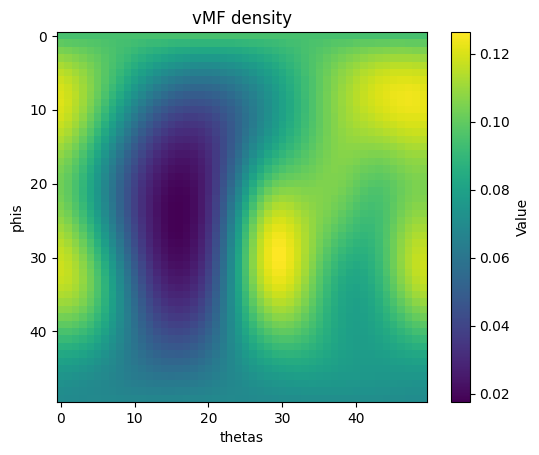

In [21]:
# plot vMF density 

c = 10
centers = np.random.normal(0,1,size=(c,3))
centers /= LA.norm(centers, axis=1, keepdims=True)
w_vmf = np.random.uniform(0,1,c)
w_vmf = w_vmf/np.sum(w_vmf)


ngrid = 50 
_ths = np.pi*np.arange(ngrid)/ngrid
_phs = 2*np.pi*np.arange(ngrid)/ngrid

ths, phs = np.meshgrid(_ths,_phs,indexing='ij')
ths, phs = ths.flatten(), phs.flatten()


# grid = {}
# grid['ths'] = ths
# grid['phs'] = phs 

grid = Grid_3d(type='spherical', ths=ths, phs=phs)


kappa = 3
f_vmf = vMF_density(centers,w_vmf,kappa,grid)
f_vmf = f_vmf.reshape((ngrid,ngrid))

plt.imshow(f_vmf, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')  # Add a colorbar for reference
plt.title("vMF density")
plt.xlabel("thetas")
plt.ylabel("phis")
plt.show()

In [22]:
# test the if the integral over sphere is 1 

xlege, wlege = lgwt(ngrid, -1, 1)
_ths = np.arccos(xlege)

_ths, _phs = np.meshgrid(_ths,_phs,indexing='ij')
_ths, _phs = _ths.flatten(), _phs.flatten()

_wphs = 2*np.pi*np.ones(ngrid)/ngrid

wths, wphs = np.meshgrid(wlege,_wphs,indexing='ij')
wths, wphs = wths.flatten(), wphs.flatten()
wsph = wths*wphs


# _grid = {}
# _grid['ths'] = _ths 
# _grid['phs'] = _phs 
_grid = Grid_3d(type='spherical', ths=_ths, phs=_phs)


f = vMF_density(centers,w_vmf,kappa,_grid)

np.sum(f*wsph)

0.9999999889776543

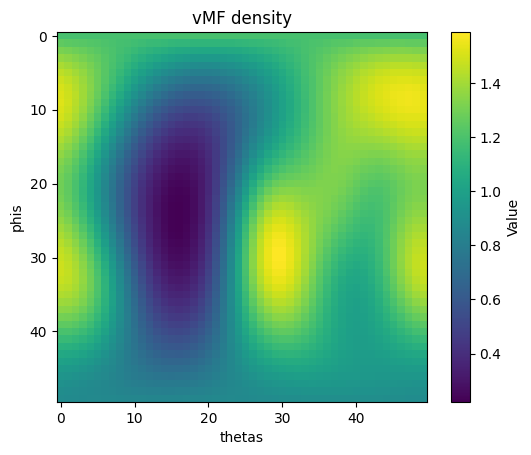

In [23]:
# transform the vMF distribution 


def my_fun(th,ph):
    grid = Grid_3d(type='spherical', ths=np.array([th]),phs=np.array([ph]))
    return 4*np.pi*vMF_density(centers,w_vmf,kappa,grid)[0]
# my_fun(1,2)

ell_max = 8 
sph_coef, indices = full_sph_harm_transform(my_fun, ell_max)

f_vmf_expand = full_sph_harm_eval(sph_coef, ell_max, grid)
f_vmf_expand = np.real(f_vmf_expand.reshape([ngrid, ngrid]))


plt.imshow(f_vmf_expand, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')  # Add a colorbar for reference
plt.title("vMF density")
plt.xlabel("thetas")
plt.ylabel("phis")
plt.show()

In [24]:
LA.norm(f_vmf-f_vmf_expand/4/np.pi,'fro')/LA.norm(f_vmf,'fro')

1.8882377696798286e-05

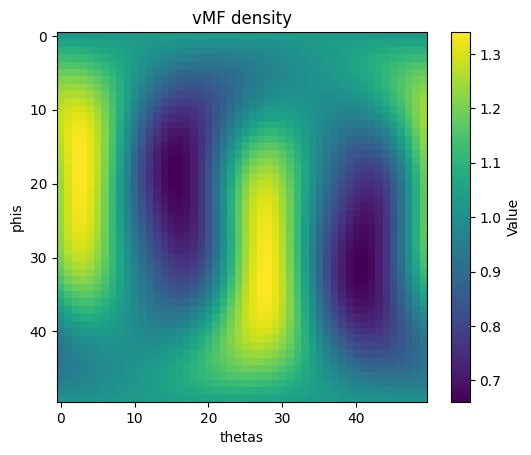

In [25]:
# use only the even degree spherical harmonics 
ell_max_half = 3 

sph_coef, indices = sph_harm_transform(my_fun, ell_max_half)
f_vmf_expand = sph_harm_eval(sph_coef, ell_max_half, grid)
f_vmf_expand = np.real(f_vmf_expand.reshape([ngrid, ngrid]))

plt.imshow(f_vmf_expand, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')  # Add a colorbar for reference
plt.title("vMF density")
plt.xlabel("thetas")
plt.ylabel("phis")
plt.show()

In [26]:
# check real and complex transform

sph_r_t_c, sph_c_t_r = get_sph_r_t_c_mat(ell_max_half)
sph_coef_r = sph_c_t_r @ sph_coef

LA.norm(np.imag(sph_coef_r))

0.0

In [27]:
# map to rotation coefficient 
rot_coef = sph_t_rot_coef(sph_coef, ell_max_half)


# integrate over SO3 to get 1 
ell_max = 2*ell_max_half 
euler_nodes, weights = load_so3_quadrature(ell_max, 0)

evals = np.zeros(len(weights), dtype=np.complex128)
for i in range(len(weights)):
    alpha = euler_nodes[i,0]
    beta = euler_nodes[i,1]
    gamma = euler_nodes[i,2]
    for ell in range(ell_max+1):
        if ell % 2 == 0:
            Dl = wignerD(ell,alpha,beta,gamma)
            for m in range(-ell,ell+1):
                evals[i] += weights[i]*rot_coef[indices[(ell,m)]]*Dl[m+ell,ell]

                
np.sum(evals)

(0.9999999938071131-5.365953720855993e-19j)

In [28]:
# effectively doing the same thing as above 

Psi = precompute_rot_density(rot_coef, ell_max_half, euler_nodes)
evals = Psi@rot_coef
np.dot(Psi@rot_coef, weights)


(0.9999999938071129+2.0341053126455293e-19j)